### 量子减法器----->同位数相减

In [1]:
from qiskit import BasicAer, execute
from time import time
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from pprint import pprint
import pixiedust
from quantum_logic_operation import quantum_subtraction

Pixiedust database opened successfully


In [2]:
reduction_qbit = 2
minuend_qbit = 2
assist_qbit = 3
all_qbit = reduction_qbit + minuend_qbit + assist_qbit
q_reduction = QuantumRegister(reduction_qbit, 'rc')
q_minuend = QuantumRegister(minuend_qbit, 'md')
q_ass = QuantumRegister(assist_qbit, 'ass')
circuit = QuantumCircuit()
cr = ClassicalRegister(all_qbit, 'cr')

circuit.add_register(q_minuend)
circuit.add_register(q_reduction)
circuit.add_register(q_ass)
all_component_lst = [q_minuend, q_reduction, q_ass]
qbit_lst = []
for _ in all_component_lst:
    for i in range(_.size):
        qbit_lst.append(_[i])
pprint(qbit_lst)

[(QuantumRegister(2, 'md'), 0),
 (QuantumRegister(2, 'md'), 1),
 (QuantumRegister(2, 'rc'), 0),
 (QuantumRegister(2, 'rc'), 1),
 (QuantumRegister(3, 'ass'), 0),
 (QuantumRegister(3, 'ass'), 1),
 (QuantumRegister(3, 'ass'), 2)]


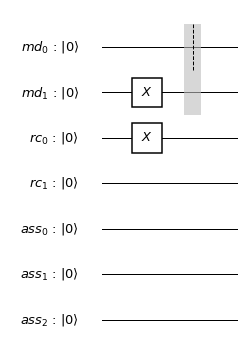

In [3]:
minuend_num = 1
reduction_num = 2
minuend_str = bin(minuend_num)[2:].zfill(minuend_qbit)
reduction_str = bin(reduction_num)[2:].zfill(reduction_qbit)
num_str = minuend_str + reduction_str
for i in range(len(num_str)):
    if num_str[i] == '1':
        circuit.x(qbit_lst[i])
circuit.barrier()
circuit.draw(output='mpl')

In [4]:
# %%pixie_debugger
quantum_subtraction(circuit,qbit_lst,minuend_qbit,reduction_qbit)

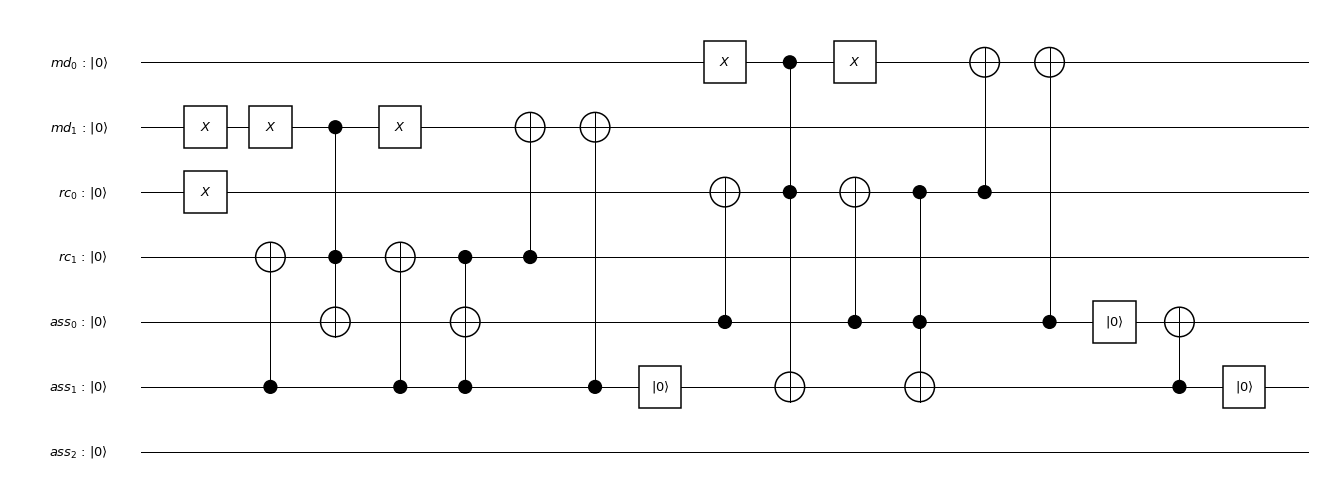

In [5]:
circuit.draw(
    output='mpl', scale=1, plot_barriers=False, filename='circuit-debug')

In [36]:
circuit.add_register(cr)
for _ in range(all_qbit):
    circuit.measure(qbit_lst[_], cr[_])
backend = BasicAer.get_backend('qasm_simulator')
result = execute(circuit, backend, shots=1).result()
counts = result.get_counts(circuit)
all_lst = list(counts.keys())
all_lst

['0010111']